이 장에서는 신경망 모델을 사용하여 심장병을 예측해 볼 것이다. UCI 데이터 저장소에 있는 데이터를 사용하는데, 이것은 300여 명의 환자에 대해 76개의 건강과 관련된 변수들을 포함하고 있다. 이 데이터를 사용하여 관상동맥질환을 예측할 것이다. 

순서는 다음과 같다. 

- 데이터셋 
- 결측값 정리 
- 데이터셋 분리하기 
- 신경망 훈련
- 다중 분류와 이진 분류의 비교 

## 데이터셋 

우리가 사용할 데이터는 UCI 데이터 저장소에 있는 심장 질환에 관한 데이터셋이다. <http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/>에서 직접 데이터를 다운로드 할 수도 있다. 

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))

Python: 3.8.6 | packaged by conda-forge | (default, Jan 25 2021, 23:22:12) 
[Clang 11.0.1 ]


In [2]:
pkgs = {'Pandas': pd, 
        'NumPy': np, 
        'Sklearn': sklearn, 
        'Matplotlib': matplotlib,
        'Keras': keras}
for k, v in pkgs.items():
        print(f'{k}: {v.__version__}')


Pandas: 1.2.4
NumPy: 1.20.2
Sklearn: 0.24.2
Matplotlib: 3.4.1
Keras: 2.4.3


독자의 컴퓨터의 것과 이 책의 버전이 똑같을 필요는 없다. 다만 버전이 바뀌면서 발생하는 문제는 검색 등을 활용하여 해결할 필요가 있다.

이제 산점도 행렬을 그릴 때 필요한 맷플롯립과 판다스 패키지를 임포트한다.

In [3]:
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix

In [4]:
# 심장병 데이터 가져오기 
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# 판다스 데이터프레임에 사용할 열 이름 
names = ['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'class']

# csv 파일 읽기 
cleveland = pd.read_csv(url, names=names)

In [5]:
# 데이터프레임의 형태를 보고 몇 개의 샘플로 구성되어 있는지 확인
print ('Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          67.0
sex           1.0
cp            4.0
trestbps    160.0
chol        286.0
fbs           0.0
restecg       2.0
thalach     108.0
exang         1.0
oldpeak       1.5
slope         2.0
ca            3.0
thal          3.0
class           2
Name: 1, dtype: object


In [6]:
# 끝트머리에 있는 20여 명의 환자 정보
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


## 결측값 정리 

In [7]:
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [8]:
# 결측값을 나타내는 NaN을 가진 행을 삭제 
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [9]:
# 데이터프레임의 형태와 데이터 타입 확인
print(data.shape)
print(data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


이제 결측값을 가진 6 케이스가 삭제되어 남은 것은 297개의 행이다. 속성은 여전이 14개로 대부분 부동소수점 값을 가지고 있다. 

In [10]:
# 다음 분석을 위해 모두 숫자형 데이터로 변환
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [11]:
# 판다스 describe() 함수로 변수의 특징 확인
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


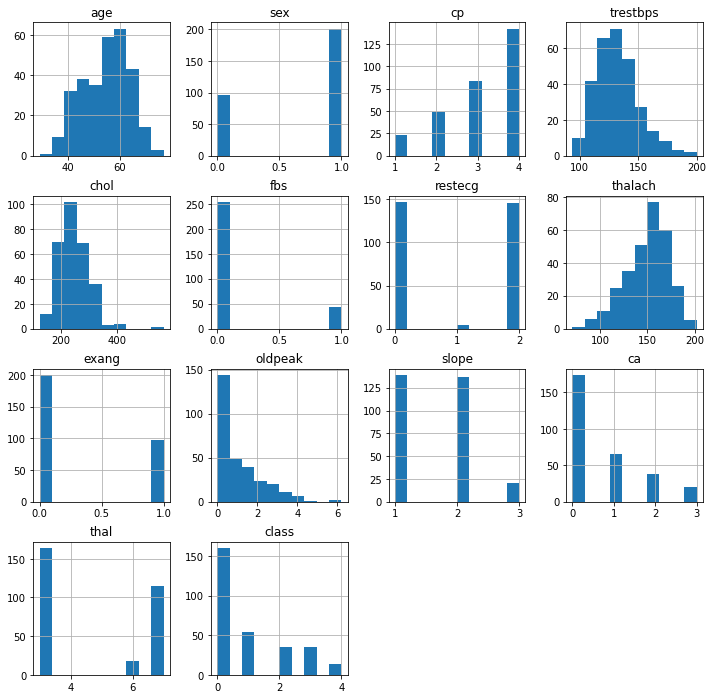

In [12]:
# 각 변수에 대한 히스토그램 
data.hist(figsize = (12, 12));
plt.show()

## 데이터셋 분리하기 

In [13]:
# 훈련용 데이터셋인 X, y(타깃) 데이터셋 만들기 
from sklearn import model_selection

X = np.array(data.drop(['class'], 1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [14]:
# 카테고리형 데이터를 원-핫 벡터로 변환
from keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print(Y_train.shape)
print(Y_train[:10])

(237, 5)
[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


## 신경망 훈련 

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 케라스 모델을 만들기 위한 사용자 정의함수 만들기 
def create_model():
    # 모델 생성
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # 모델 컴파일 
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 25        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# 모델을 훈련 데이터에 적합 
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 [==============================] - 0s 733us/step - loss: 1.6063 - accuracy: 0.5550
Epoch 2/100
24/24 [==============================] - 0s 812us/step - loss: 1.5931 - accuracy: 0.5339
Epoch 3/100
24/24 [==============================] - 0s 805us/step - loss: 1.5809 - accuracy: 0.5265
Epoch 4/100
24/24 [==============================] - 0s 795us/step - loss: 1.5682 - accuracy: 0.5395
Epoch 5/100
24/24 [==============================] - 0s 853us/step - loss: 1.5500 - accuracy: 0.5812
Epoch 6/100
24/24 [==============================] - 0s 788us/step - loss: 1.5414 - accuracy: 0.5503
Epoch 7/100
24/24 [==============================] - 0s 787us/step - loss: 1.5388 - accuracy: 0.5110
Epoch 8/100
24/24 [==============================] - 0s 670us/step - loss: 1.5054 - accuracy: 0.6015
Epoch 9/100
24/24 [==============================] - 0s 677us/step - loss: 1.5105 - accuracy: 0.5349
Epoch 10/100
24/24 [==============================] - 0s 697us/step - loss: 1.4966 - accura

In [17]:
# 이진 분류 문제로 변환- 심장 질환의 유무
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1]


## 다중 분류와 이진 분류의 비교 

In [18]:
# 이진 분류를 위해 새로운 케라스 모델 정의 
def create_binary_model():
    # 모델 생성
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # 모델 컴파일
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
# 훈련 데이터셋에 이진 모델을 적합
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 [==============================] - 0s 744us/step - loss: 0.6774 - accuracy: 0.5898
Epoch 2/100
24/24 [==============================] - 0s 928us/step - loss: 0.6656 - accuracy: 0.5599
Epoch 3/100
24/24 [==============================] - 0s 995us/step - loss: 0.6407 - accuracy: 0.6276
Epoch 4/100
24/24 [==============================] - 0s 788us/step - loss: 0.6572 - accuracy: 0.6284
Epoch 5/100
24/24 [==============================] - 0s 902us/step - loss: 0.6296 - accuracy: 0.6400
Epoch 6/100
24/24 [==============================] - 0s 873us/step - loss: 0.5696 - accuracy: 0.7193
Epoch 7/100
24/24 [==============================] - 0s 850us/step - loss: 0.5512 - accuracy: 0.7577
Epoch 8/100
24/24 [==============================] - 0s 780us/step - loss: 0.5595 - accuracy: 0.7118
Epoch 9/100
24/24 [==============================] - 0s 943us/step - loss: 0.5779 - accuracy: 0.6904
Epoch 10/100
24/24 [==============================] - 0s 829us/step - loss: 0.5147 - accura

In [20]:
# 다중 분류 모델 예측에 대한 분류 성적 보고서 생성
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = model.predict(X_test)
categorical_pred 

array([[0.53192735, 0.16494103, 0.11854124, 0.12558213, 0.05900822],
       [0.53192735, 0.16494103, 0.11854124, 0.12558213, 0.05900822],
       [0.53192735, 0.16494103, 0.11854124, 0.12558213, 0.05900822],
       [0.53192735, 0.16494103, 0.11854124, 0.12558213, 0.05900822],
       [0.53192735, 0.16494103, 0.11854124, 0.12558213, 0.05900822],
       [0.53192735, 0.16494103, 0.11854124, 0.12558213, 0.05900822],
       [0.53192735, 0.16494103, 0.11854124, 0.12558213, 0.05900822],
       [0.53192735, 0.16494103, 0.11854124, 0.12558213, 0.05900822],
       [0.53192735, 0.16494103, 0.11854124, 0.12558213, 0.05900822],
       [0.53192735, 0.16494103, 0.11854124, 0.12558213, 0.05900822],
       [0.53192735, 0.16494103, 0.11854124, 0.12558213, 0.05900822],
       [0.53192735, 0.16494103, 0.11854124, 0.12558213, 0.05900822],
       [0.53192735, 0.16494103, 0.11854124, 0.12558213, 0.05900822],
       [0.53192735, 0.16494103, 0.11854124, 0.12558213, 0.05900822],
       [0.53192735, 0.16494103, 0.

In [21]:
# 다중 분류 문제 
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)
categorical_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
# 다중 분류 모델에 대한 예측값을 사용한 분류 보고서 생성
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('다중 분류 모델에 대한 결과')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

다중 분류 모델에 대한 결과
0.5166666666666667
              precision    recall  f1-score   support

           0       0.52      1.00      0.68        31
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.52        60
   macro avg       0.10      0.20      0.14        60
weighted avg       0.27      0.52      0.35        60



/Users/brainiac/opt/anaconda3/envs/ml4hap/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brainiac/opt/anaconda3/envs/ml4hap/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brainiac/opt/anaconda3/envs/ml4hap/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [23]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
acc1 = accuracy_score(y_test, categorical_pred)
s1 = pd.Series(y_test)
class_no = s1.value_counts()
class0_no = class_no[0]
class1_no = class_no[1]
class4_no = class_no[4]
total_pts = np.sum(class_no)
sco = precision_recall_fscore_support(y_test, categorical_pred)
sco_1_precision = sco[0][0]
sco_1_recall = sco[2][0]

/Users/brainiac/opt/anaconda3/envs/ml4hap/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# 이진 모델의 예측값에 대한 분류 보고서 작성
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('이진 모델에 대한 결과')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

이진 모델에 대한 결과
0.7833333333333333
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        31
           1       0.75      0.83      0.79        29

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60

